In [1]:
# https://qiskit.org/documentation/intro_tutorial1.html

In [2]:
import numpy as np
import qiskit
from qiskit import QuantumCircuit, transpile
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram

In [3]:
# Get Qiskit version
qiskit.__qiskit_version__
import qiskit.tools.jupyter
%qiskit_version_table

In [4]:
# Create a Quantum Circuit acting on the q register
# QuantumCircuit(4, 3) # A QuantumCircuit with 4 qubits and 3 classical bits
# initializing with 2 qubits in the zero state; with 2 classical bits set to zero

circuit = QuantumCircuit(2, 2)

In [5]:
# Add a H gate on qubit 0
circuit.h(0) # Hadamard gate on qubit 0, which puts it into a superposition state

# Add a CX (CNOT) gate on control qubit 0 and target qubit 1
circuit.cx(0, 1) # CNOT operation entangles the two qubits

# Map the quantum measurement to the classical bits
circuit.measure([0,1], [0,1])

In [6]:
# Draw the circuit
circuit.draw()

┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

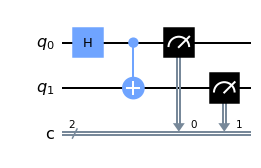

In [7]:
circuit.draw('mpl')

In [8]:
# Use Aer's qasm_simulator
simulator = QasmSimulator()

# compile the circuit down to low-level QASM instructions
# supported by the backend (not needed for simple circuits)
compiled_circuit = transpile(circuit, simulator)

# Execute the circuit on the qasm simulator
job = simulator.run(compiled_circuit, shots=10000) # shots = number of times the circuit is run

# Grab results from the job
result = job.result()

In [9]:
# Returns counts
counts = result.get_counts(circuit)
print("\nTotal count for 00 and 11 are:",counts)


Total count for 00 and 11 are: {'11': 4930, '00': 5070}


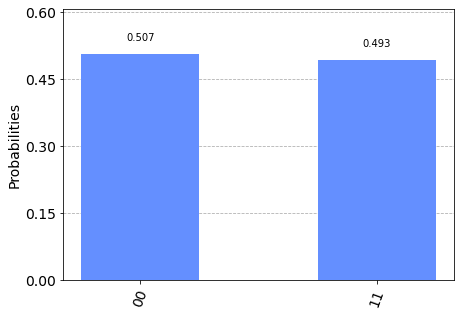

In [10]:
# Plot a histogram
plot_histogram(counts)